In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
DIRECTORY ="C:/Users/jdeed/Desktop/project/dataset/CEDAR"
CATEGORY = ["Forged","Genuine"]

def create_training_data(img_size):
    training_data=[]
    for category in CATEGORY:
        path=os.path.join(DIRECTORY,category)
        class_num=CATEGORY.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                # Otsu's thresholding after Gaussian filtering
                blur_img=cv2.GaussianBlur(img_array,(5,5),0)
                ret,thresh = cv2.threshold(blur_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #finds the region of interest
                x,y,w,h = cv2.boundingRect(thresh)
                ROI = thresh[y:y+h, x:x+w]
                #scales the data to the same size
                new_array = cv2.resize(ROI, (img_size[0],img_size[1]))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    return training_data

In [3]:
img_size=[96,96]
training_data=create_training_data(img_size)           

In [4]:
import pickle
pickle_out=open("data/unshuffled_data.pickle","wb")
pickle.dump(training_data,pickle_out)
pickle_out.close()

In [5]:
def x_ydata(data,img_size):
    X=[]
    y=[]
    for i,j in data:
        X.append(i)
        y.append(j)
        
    X=np.array(X).reshape(-1,img_size[1],img_size[0],1)
    return X,y

In [6]:
import random
random.shuffle(training_data)
X,y=x_ydata(training_data,img_size)

In [7]:
X.shape

(2640, 96, 96, 1)

In [8]:
pickle_out=open("data/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("data/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

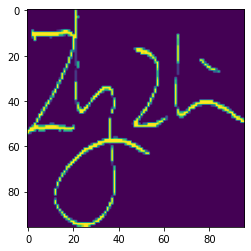

In [9]:
plt.imshow(X[0])

In [10]:
img_size=[128,128]
training_data_nn=create_training_data(img_size)
import random
random.shuffle(training_data_nn)
Xnn,ynn=x_ydata(training_data_nn,img_size)

pickle_out=open("data/Xnn.pickle","wb")
pickle.dump(Xnn,pickle_out)
pickle_out.close()

pickle_out=open("data/ynn.pickle","wb")
pickle.dump(ynn,pickle_out)
pickle_out.close()

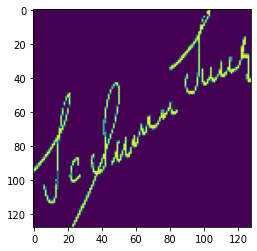

In [11]:
plt.imshow(Xnn[100])